Import packages

In [1]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

import numpy as np

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('..//data/df_for_model_training.csv')

In [3]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP/G,FG/G,FGA/G,FG%/G,3P/G,3PA/G,3P%/G,2P/G,2PA/G,2P%/G,eFG%/G,FT/G,FTA/G,FT%/G,ORB/G,DRB/G,TRB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,SEASON_END,NBA_ALL_TEAM,ALL_STAR
0,Michael Adams,PG,26,DEN,77,77,36.2,6.1,14.1,0.433,2.2,6.1,0.356,3.9,8.0,0.490,0.509,4.2,5.1,0.819,0.9,2.8,3.7,6.4,2.2,0.1,2.3,1.9,18.5,2787,17.5,0.567,0.431,0.363,2.5,8.3,5.2,22.2,2.7,0.2,12.5,19.7,5.4,2.9,8.3,0.143,2.7,0.2,2.9,3.4,1989,M,NaN
1,Mark Aguirre,SF,29,TOT,80,76,32.5,7.3,15.9,0.461,0.6,2.2,0.293,6.7,13.7,0.488,0.481,3.6,4.9,0.733,1.8,3.0,4.8,3.5,0.6,0.5,2.6,2.9,18.9,2597,16.4,0.524,0.137,0.309,6.4,10.0,8.3,17.9,0.9,0.8,12.6,27.4,2.4,2.1,4.5,0.082,1.4,-1.3,0.1,1.4,1989,M,NaN
2,Danny Ainge,PG,29,TOT,73,54,32.6,6.6,14.4,0.457,1.6,4.2,0.380,5.0,10.2,0.488,0.512,2.8,3.3,0.854,1.0,2.5,3.5,5.5,1.3,0.1,2.0,2.5,17.5,2377,18.0,0.554,0.290,0.228,3.3,8.7,6.0,25.3,1.9,0.2,11.1,22.6,5.2,1.4,6.7,0.135,2.9,-0.4,2.5,2.7,1989,M,NaN
3,Danny Ainge,PG,29,BOS,45,28,30.0,6.0,13.1,0.460,1.3,3.4,0.374,4.7,9.6,0.491,0.509,2.5,2.8,0.891,0.8,2.6,3.4,4.8,1.2,0.0,1.8,2.4,15.9,1349,17.5,0.553,0.263,0.217,3.2,9.8,6.6,23.1,1.9,0.0,11.3,22.4,2.9,0.8,3.8,0.133,2.7,-0.4,2.3,1.5,1989,M,NaN
4,Ron Anderson,SF,30,PHI,82,12,31.9,6.9,14.0,0.491,0.0,0.1,0.182,6.9,13.9,0.494,0.492,2.4,2.8,0.856,2.0,2.9,5.0,1.7,0.9,0.3,1.5,2.0,16.2,2618,15.3,0.531,0.010,0.199,7.1,10.3,8.7,7.9,1.3,0.5,9.1,21.9,3.5,0.9,4.4,0.081,0.6,-2.0,-1.3,0.4,1989,M,NaN


In [4]:
df['ALL_STAR'] = df['ALL_STAR'].fillna('NO') # convert nan to NO
df['ALL_STAR'] = pd.factorize(df['ALL_STAR'])[0]

Determine some features to use

In [5]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP/G', 'FG/G', 'FGA/G',
       'FG%/G', '3P/G', '3PA/G', '3P%/G', '2P/G', '2PA/G', '2P%/G', 'eFG%/G',
       'FT/G', 'FTA/G', 'FT%/G', 'ORB/G', 'DRB/G', 'TRB/G', 'AST/G', 'STL/G',
       'BLK/G', 'TOV/G', 'PF/G', 'PTS/G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'SEASON_END',
       'NBA_ALL_TEAM', 'ALL_STAR'],
      dtype='object')

In [6]:
features = ['G','2P/G','3P/G','FG/G','MP/G', 'PER', 'eFG%/G','FT/G',
            'ORB/G','DRB/G','TRB/G','AST/G','STL/G','BLK/G','PTS/G',
            'WS', 'TS%', 'VORP', 'BPM', 'USG%', 'ALL_STAR']

In [7]:
X = df[features].values

# label encoding
y = df['NBA_ALL_TEAM']
y_cat = pd.factorize(df.NBA_ALL_TEAM)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size = 0.33)

In [8]:
# data scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:
def model_build(neurons, activation, h_layers, loss):
    # Create model
   
    model = Sequential()
    
    #First hidden layer
    model.add(Dense(neurons, input_dim = X_train.shape[1], activation = activation))
    
    #Extra layers
    if h_layers > 1:
        for i in range(2, h_layers + 1):
            model.add(Dense(neurons,  activation = activation))
    
    #Output layer with softma activation
    model.add(Dense(4, activation='softmax'))
    
    # Compile model
    model.compile(loss = loss, optimizer='adam', metrics=['accuracy'])
    
    return model

In [10]:
# Define early stop parameter
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor= 'val_loss', mode = 'min',
                           verbose = 0, patience = 25)

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
estimator = KerasClassifier(build_fn=model_build, epochs = 200, batch_size=25, verbose=0)
activation = ['relu', 'sigmoid']
neurons = [8, 10, 15, 20] 
h_layers = [2,3]
loss_func = ['categorical_crossentropy', 'sparse_categorical_crossentropy', 'kullback_leibler_divergence']
param_grid = dict(activation=activation, neurons=neurons, h_layers=h_layers, loss = loss_func)

grid = RandomizedSearchCV(estimator=estimator, param_distributions = param_grid, n_jobs=1, cv=3)

grid_result = grid.fit(X_train, y_train, validation_data = (X_test, y_test) , callbacks = [early_stop])


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 66, in _method_wrapper
    return method(self, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python

In [13]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.942204 using {'neurons': 20, 'loss': 'sparse_categorical_crossentropy', 'h_layers': 2, 'activation': 'relu'}
0.937922 (0.006948) with: {'neurons': 10, 'loss': 'sparse_categorical_crossentropy', 'h_layers': 3, 'activation': 'sigmoid'}
0.939349 (0.007131) with: {'neurons': 8, 'loss': 'sparse_categorical_crossentropy', 'h_layers': 2, 'activation': 'relu'}
0.938636 (0.007344) with: {'neurons': 8, 'loss': 'sparse_categorical_crossentropy', 'h_layers': 2, 'activation': 'sigmoid'}
0.942204 (0.006311) with: {'neurons': 20, 'loss': 'sparse_categorical_crossentropy', 'h_layers': 2, 'activation': 'relu'}
0.939707 (0.009353) with: {'neurons': 20, 'loss': 'sparse_categorical_crossentropy', 'h_layers': 3, 'activation': 'sigmoid'}
0.938990 (0.010759) with: {'neurons': 10, 'loss': 'sparse_categorical_crossentropy', 'h_layers': 2, 'activation': 'sigmoid'}
0.937564 (0.009604) with: {'neurons': 15, 'loss': 'sparse_categorical_crossentropy', 'h_layers': 3, 'activation': 'sigmoid'}
0.290581 (0.3549

In [14]:
# estimator = KerasClassifier(build_fn=model_build, epochs = 100, batch_size=25, verbose=0)

# # define the grid search parameters
# activation = ['relu', 'sigmoid']
# neurons = [8, 10, 15, 20] 
# h_layers = [2,3]
# loss_func = ['categorical_crossentropy', 'sparse_categorical_crossentropy', 'kullback_leibler_divergence']
# param_grid = dict(activation=activation, neurons=neurons, h_layers=h_layers, loss = loss_func)

# grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=1, cv=3)

# grid_result = grid.fit(X_train, y_train, validation_data = (X_test, y_test) , callbacks = [early_stop])

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [15]:
best_par = grid_result.best_params_

best_estimator = model_build(neurons = best_par['neurons'], h_layers = best_par['h_layers'], 
                           activation = best_par['activation'], loss = best_par['loss'])
history = best_estimator.fit(X_train, y_train,
                        validation_data=(X_test,y_test),callbacks = [early_stop], epochs = 200,  verbose = 0)


In [16]:
import matplotlib.pyplot as plt

(0.15, 0.95)

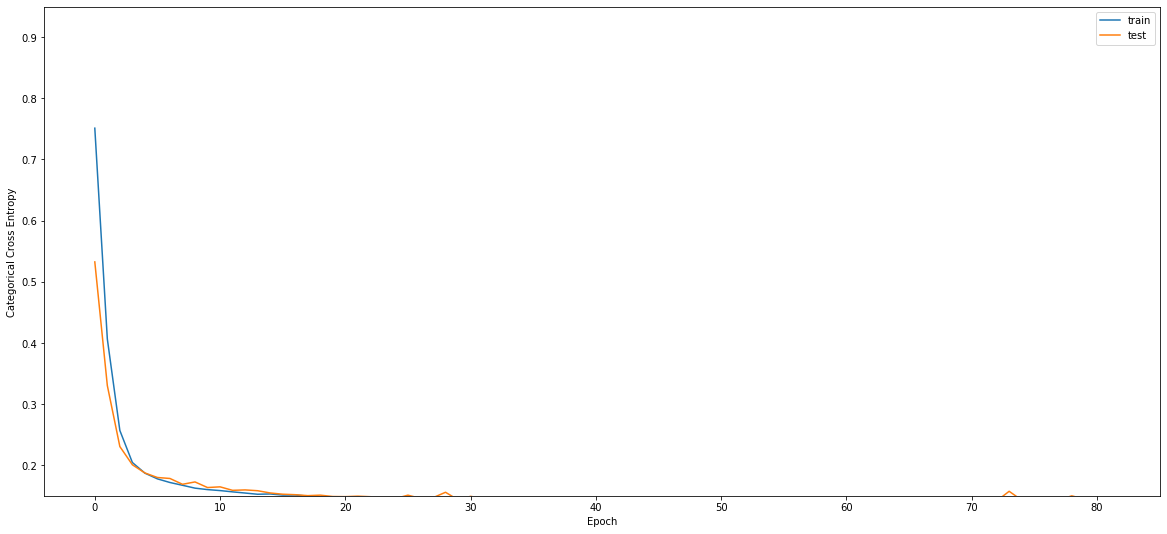

In [17]:
plt.figure(figsize=(20,9))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Categorical Cross Entropy')
plt.ylim(.15,.95)


(0.75, 0.95)

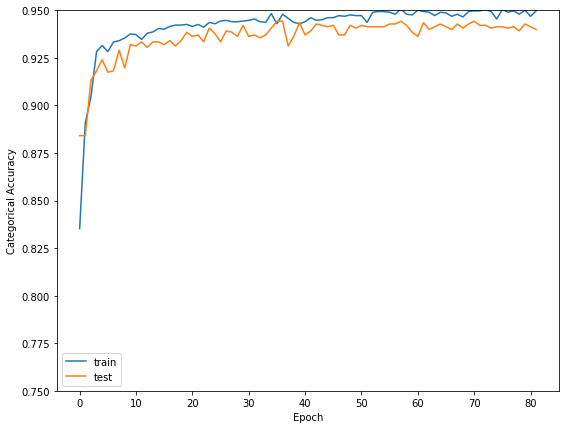

In [18]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.ylim(.75,.95)

In [19]:
best_estimator.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 20)                440       
_________________________________________________________________
dense_109 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_110 (Dense)            (None, 4)                 84        
Total params: 944
Trainable params: 944
Non-trainable params: 0
_________________________________________________________________


In [20]:
nba_df = pd.read_csv('../data/nba_19-20.csv')

In [21]:
nba_df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP_x', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'MP_y',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' .1', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Players', 'Season', 'ALL_STAR'],
      dtype='object')

In [22]:
nba_df[nba_df['Player'] == 'Russell Westbrook']

,Player,Pos,Age,Tm,G,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MP_y,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP,Players,Season,ALL_STAR
597,Russell Westbrook,PG,31,HOU,53,53,35.9,10.7,22.6,0.474,1.0,3.8,0.254,9.8,18.8,0.518,0.495,5.1,6.5,0.777,1.8,6.3,8.0,7.0,1.7,0.3,4.5,3.5,27.5,1905,21.5,0.539,0.168,0.289,5.1,18.4,11.7,35.0,2.1,0.8,14.9,34.4,NaN,2.1,2.3,4.3,0.109,NaN,1.9,-0.1,1.8,1.8,Russell Westbrook,2020.0,YES


In [23]:
columns_per_game = {'FG' : 'FG/G',
                    'FGA' : 'FGA/G',
                    'FG%' : 'FG%/G',
                    '3P' :  '3P/G',
                    '3PA' : '3PA/G',
                    '3P%':  '3P%/G',
                    '2P':  '2P/G',
                    '2PA': '2PA/G',
                    '2P%': '2P%/G',
                    'eFG%': 'eFG%/G',
                    'FT' : 'FT/G', 
                    'FTA': 'FTA/G', 
                    'FT%': 'FT%/G',
                    'ORB': 'ORB/G', 
                    'DRB': 'DRB/G', 
                    'TRB': 'TRB/G', 
                    'AST': 'AST/G', 
                    'STL': 'STL/G', 
                    'BLK': 'BLK/G', 
                    'TOV': 'TOV/G', 
                    'PF' : 'PF/G', 
                    'PTS': 'PTS/G',
                    'MP_x': 'MP/G',
                    'MP_y': 'MP'}

In [24]:
nba_df = nba_df.rename(columns = columns_per_game)

In [25]:
nba_df['ALL_STAR'] = pd.factorize(nba_df['ALL_STAR'])[0]

In [26]:
features = ['G','2P/G','3P/G','FG/G','MP/G', 'PER', 'eFG%/G','FT/G',
            'ORB/G','DRB/G','TRB/G','AST/G','STL/G','BLK/G','PTS/G',
            'WS', 'TS%', 'VORP', 'BPM', 'USG%', 'ALL_STAR']

In [27]:
df_2019 = nba_df[(nba_df['WS'] > 3.5) & (nba_df['MP'] >= 1200)]
df_2019 = df_2019[features].values
X_2019 = scaler.transform(df_2019)
prediction = best_estimator.predict(X_2019)

In [28]:
prediction.argmax()

168

In [29]:
pred_df = pd.DataFrame(prediction, columns = ['NA','1st', '2nd', '3rd'])

In [30]:
pred_df = pd.merge(nba_df[(nba_df.WS > 3.5) & (nba_df.MP >= 1200)] , pred_df, on = pred_df.index)

In [31]:
pred_df

,key_0,Player,Pos,Age,Tm,G,GS,MP/G,FG/G,FGA/G,FG%/G,3P/G,3PA/G,3P%/G,2P/G,2PA/G,2P%/G,eFG%/G,FT/G,FTA/G,FT%/G,ORB/G,DRB/G,TRB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP,Players,Season,ALL_STAR,NA,1st,2nd,3rd
0,0,Steven Adams,C,26,OKC,58,58,27.0,4.5,7.6,0.591,0.0,0.1,0.333,4.5,7.6,0.593,0.593,1.9,3.2,0.590,3.4,6.0,9.4,2.4,0.9,1.1,1.5,1.9,10.9,1564,20.8,0.605,0.007,0.413,14.4,23.8,19.3,13.5,1.6,3.5,14.1,17.2,NaN,3.7,2.5,6.2,0.190,NaN,2.1,1.1,3.2,2.0,NaN,NaN,0,0.951514,2.021438e-04,0.001473,0.046811
1,1,Bam Adebayo,PF,22,MIA,65,65,34.4,6.3,11.1,0.567,0.0,0.2,0.077,6.3,10.9,0.576,0.568,3.6,5.3,0.690,2.5,8.0,10.5,5.1,1.2,1.3,2.8,2.5,16.2,2235,20.6,0.606,0.018,0.476,8.7,25.0,17.2,23.6,1.7,3.8,17.5,20.8,NaN,4.6,3.6,8.1,0.175,NaN,1.6,2.1,3.6,3.2,Bam Adebayo,2020.0,1,0.001815,1.267865e-01,0.327521,0.543877
2,2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,1754,19.8,0.571,0.198,0.241,6.3,17.8,12.0,11.4,1.0,4.4,7.8,23.6,NaN,3.1,1.4,4.4,0.122,NaN,1.8,-0.5,1.3,1.5,NaN,NaN,0,0.936713,2.912995e-04,0.002788,0.060208
3,3,Jarrett Allen,C,21,BRK,64,58,25.7,4.2,6.5,0.646,0.0,0.1,0.000,4.2,6.4,0.654,0.646,2.3,3.7,0.620,3.0,6.4,9.5,1.3,0.6,1.3,1.1,2.3,10.6,1647,20.3,0.658,0.012,0.574,12.5,25.0,18.9,7.8,1.1,4.3,12.2,15.0,NaN,4.3,2.8,7.1,0.207,NaN,1.0,1.1,2.1,1.7,NaN,NaN,0,0.957037,1.290973e-04,0.001076,0.041758
4,4,Giannis Antetokounmpo,PF,25,MIL,57,57,30.9,10.9,20.0,0.547,1.5,4.8,0.306,9.5,15.2,0.622,0.583,6.3,10.0,0.633,2.3,11.5,13.7,5.8,1.0,1.0,3.7,3.0,29.6,1763,31.6,0.608,0.238,0.500,7.8,34.5,22.0,33.9,1.5,2.9,13.1,37.4,NaN,5.6,4.8,10.4,0.282,NaN,7.4,4.1,11.5,6.0,Giannis Antetokounmpo,2020.0,1,0.000055,9.233716e-01,0.059034,0.017539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,87,Lou Williams,SG,33,LAC,60,8,29.3,6.1,14.7,0.416,1.8,4.9,0.363,4.3,9.8,0.442,0.476,4.6,5.4,0.863,0.5,2.6,3.1,5.7,0.7,0.2,2.9,1.3,18.7,1757,17.2,0.546,0.334,0.365,1.7,9.1,5.5,29.9,1.1,0.5,14.4,28.3,NaN,2.2,1.7,3.9,0.107,NaN,2.1,-1.4,0.8,1.2,NaN,NaN,0,0.989833,8.023924e-05,0.001605,0.008483
88,88,Christian Wood,PF,24,DET,62,12,21.4,4.6,8.2,0.567,0.9,2.3,0.386,3.8,5.9,0.636,0.620,2.9,3.9,0.744,1.7,4.6,6.3,1.0,0.5,0.9,1.4,1.6,13.1,1325,23.2,0.659,0.276,0.476,8.8,24.8,16.7,7.6,1.3,3.4,12.0,23.0,NaN,3.6,1.5,5.1,0.184,NaN,3.5,-0.3,3.1,1.7,NaN,NaN,0,0.996202,4.756501e-06,0.000079,0.003714
89,89,Delon Wright,SG,27,DAL,65,5,21.7,2.8,5.9,0.470,0.7,1.8,0.385,2.1,4.1,0.508,0.529,1.1,1.4,0.789,1.0,3.0,4.0,3.4,1.2,0.3,1.0,1.3,7.3,1412,16.1,0.563,0.307,0.236,5.0,14.0,9.6,21.2,2.6,1.3,13.9,14.8,NaN,2.6,1.8,4.3,0.148,NaN,0.4,2.0,2.4,1.6,NaN,NaN,0,0.999737,1.934244e-07,0.000007,0.000256
90,90,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,3.4,9.5,0.361,5.7,11.4,0.501,0.519,8.0,9.3,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2120,23.9,0.595,0.455,0.448,1.6,11.5,6.5,45.6,1.4,0.3,16.2,34.9,NaN,5.4,0.5,5.9,0.134,NaN,6.3,-2.3,4.0,3.2,Trae Young,2020.0,1,0.001545,2.449059e-01,0.523045,0.230504


In [32]:
pred_df['tabulate'] = pred_df['1st']*10.0 + pred_df['2nd']*5.0 + pred_df['3rd']*3.0

In [33]:
pred_df[['Player', '1st', '2nd', '3rd','tabulate']].sort_values(by = 'tabulate', ascending = False)[0:5]

,Player,1st,2nd,3rd,tabulate
4,Giannis Antetokounmpo,0.923372,0.059034,0.017539,9.581502
36,James Harden,0.844867,0.127890,0.027128,9.169508
24,Luka Dončić,0.771018,0.197026,0.031828,8.790794
47,LeBron James,0.741597,0.222149,0.036126,8.635097
20,Anthony Davis,0.713155,0.170723,0.115839,8.332679


In [34]:
pred_df[['Player', '1st', '2nd', '3rd','tabulate']].sort_values(by = 'tabulate', ascending = False)[5:10]

,Player,1st,2nd,3rd,tabulate
53,Kawhi Leonard,0.623042,0.251808,0.124554,7.863122
48,Nikola Jokić,0.394516,0.306259,0.298158,6.370926
90,Trae Young,0.244906,0.523045,0.230504,5.755798
27,Joel Embiid,0.286331,0.274384,0.437112,5.546573
85,Russell Westbrook,0.095320,0.556085,0.348085,4.777883


In [35]:
pred_df[['Player', '1st', '2nd', '3rd','tabulate']].sort_values(by = 'tabulate', ascending = False)[10:15]

,Player,1st,2nd,3rd,tabulate
33,Rudy Gobert,0.198667,0.193248,0.606761,4.773191
15,Jimmy Butler,0.148596,0.361875,0.487866,4.758928
72,Domantas Sabonis,0.140595,0.362943,0.495132,4.706059
1,Bam Adebayo,0.126787,0.327521,0.543877,4.537102
65,Chris Paul,0.128143,0.324252,0.544128,4.535075


### players who got snubbed

In [37]:
pred_df[['Player', '1st', '2nd', '3rd','tabulate']].sort_values(by = 'tabulate', ascending = False)[15:20]

,Player,1st,2nd,3rd,tabulate
54,Damian Lillard,0.369646,0.100533,0.075902,4.426830
59,Khris Middleton,0.096571,0.270997,0.627878,4.204331
57,Kyle Lowry,0.080789,0.272576,0.642629,4.098653
73,Pascal Siakam,0.062194,0.297964,0.638238,4.026468
83,Kemba Walker,0.063383,0.279483,0.649781,3.980587
